In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vishesh1412/twitter-dataset-tesla")

print("Path to dataset files:", path)

In [ ]:
import pandas as pd

DataPath = r'Path'
DataPath = DataPath.replace('\\','/')
TeslaData = pd.read_csv(DataPath + '/Tesla.csv')
TeslaData.head()
# TeslaData.isnull().sum()
# TeslaData.count()
# TeslaData.info()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1546541426317590528,1545826164564000768,1.657559e+12,2022-07-11 17:06:24,0,NaN,@GailAlfarATX @elonmusk @Tesla @teslacn @Tesla...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'GailAlfarATX', 'name': 'Gail...",NaN,NaN,NaN,NaN
1,1,1546541415857102850,1545826164564000768,1.657559e+12,2022-07-11 17:06:21,0,NaN,@elonmusk @GailAlfarATX @Tesla @teslacn @Tesla...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'elonmusk', 'name': 'Elon Mus...",NaN,NaN,NaN,NaN
2,2,1546541411897581568,1546541411897581568,1.657559e+12,2022-07-11 17:06:20,0,NaN,"@elonmusk #Think about buying a country , #Mex...",en,"['think', 'mexico', 'constitution']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,1546541379110805508,1546340000500813824,1.657559e+12,2022-07-11 17:06:12,0,NaN,"@get_innocuous Actual receipts, and yet you ha...",en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'get_innocuous', 'name': 'tra...",NaN,NaN,NaN,NaN
4,4,1546541363470028800,1546541363470028800,1.657559e+12,2022-07-11 17:06:09,0,NaN,Tesla wall battery for the save! Power went ou...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


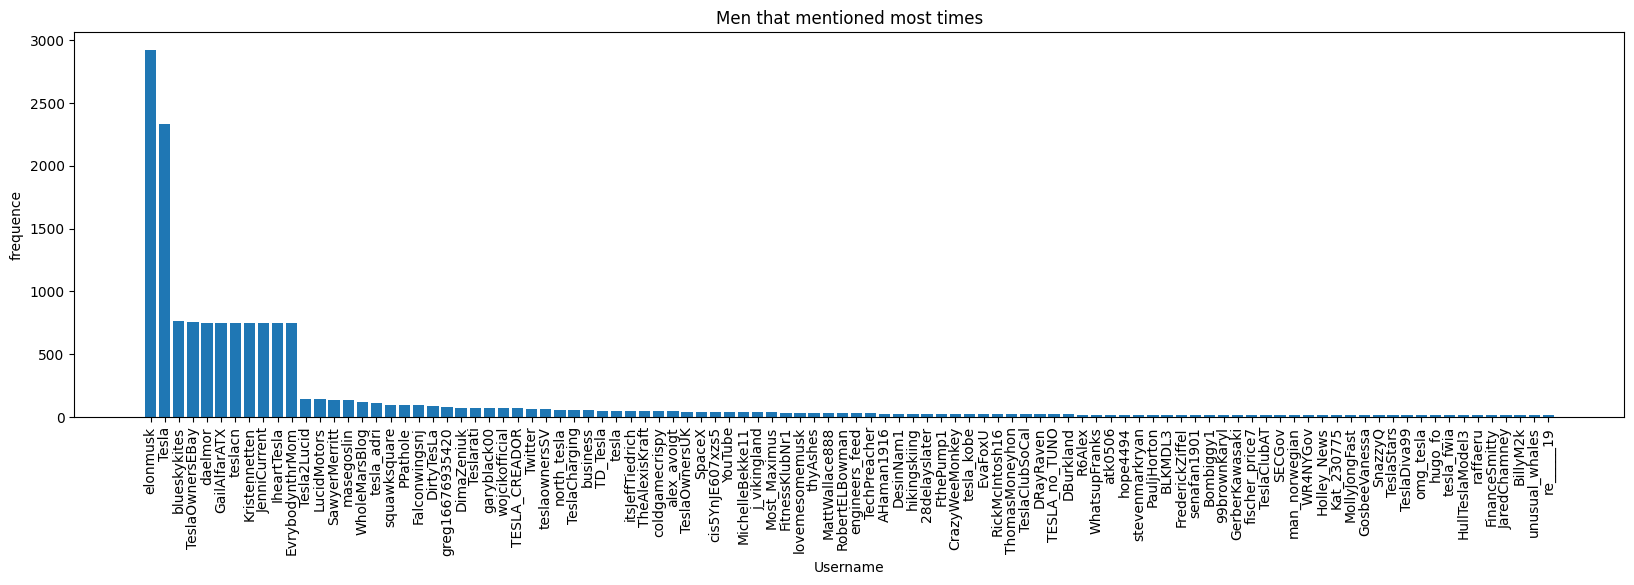

In [23]:
# Exploratory Data Analysis
import re
import matplotlib.pyplot as plt

mentions = {}
for tweet in TeslaData['tweet']:
    usernames = re.findall(r'@(\w+)', tweet)
    for username in usernames:
        if username in mentions:
            mentions[username] += 1
        else:
            mentions[username] = 1
mentionsDataframe = pd.DataFrame.from_dict(mentions, orient='index', columns=['count'])
mentionsDataframe = mentionsDataframe.sort_values(by=['count'], ascending=False)
top100_mentions = mentionsDataframe.head(100)
top100_mentions
plt.figure(figsize=(20,5))
plt.bar(top100_mentions.index, top100_mentions['count'])
plt.title('Men that mentioned most times')
plt.xlabel('Username')
plt.ylabel('frequence')
plt.xticks(rotation=90)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\v-juntaoli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\v-juntaoli\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


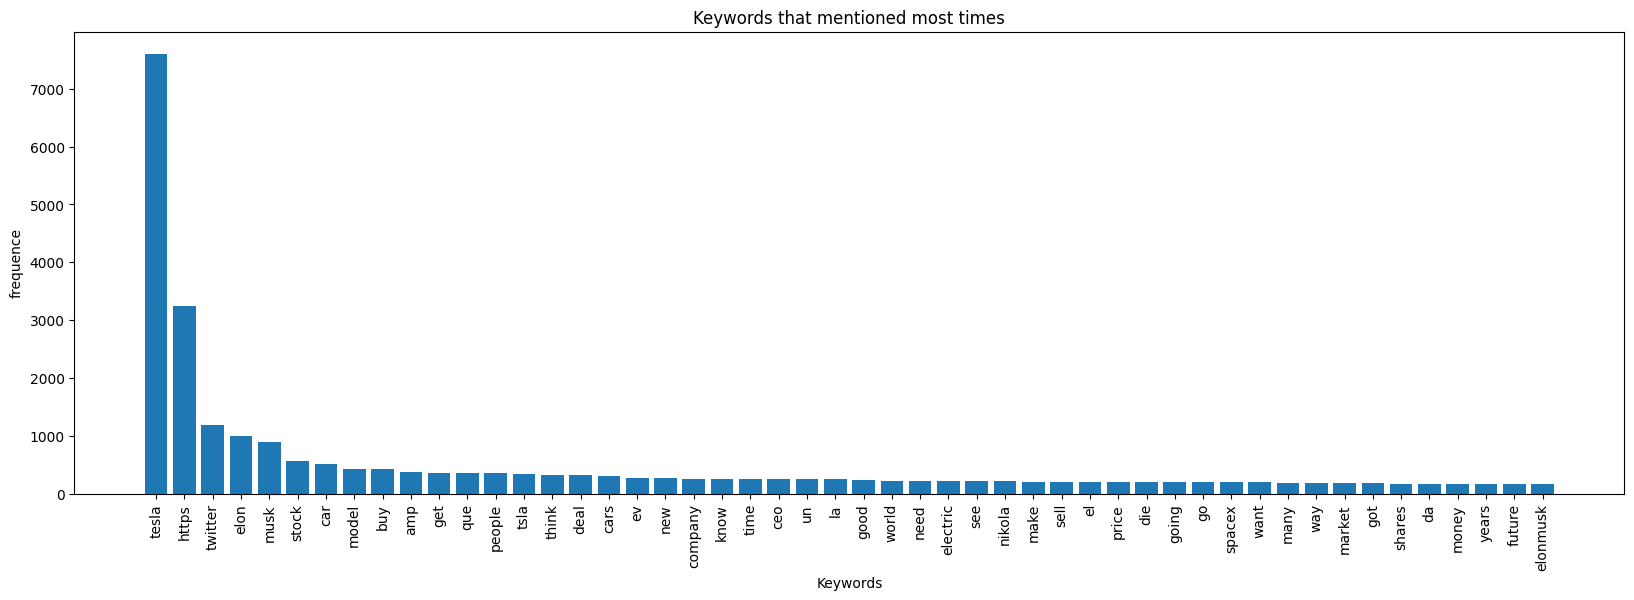

In [40]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')

pattern = r'@(\w+)'
TeslaData['clean_tweet'] = TeslaData['tweet'].apply(lambda x: re.sub(pattern, '', x))
stopwords = set(stopwords.words('english'))
keywords = []
for tweet in TeslaData['clean_tweet']:
    tokens = word_tokenize(tweet.lower())
    tags = pos_tag(tokens)
    for word, tag in tags:
        if tag.startswith('N') or tag.startswith('J') or tag.startswith('V'):
            if word not in stopwords and word.isalpha():
                keywords.append(word)
keywords = Counter(keywords)

top50Keywords = dict(keywords.most_common(50))
plt.figure(figsize=(20,6))
plt.bar(top50Keywords.keys(), top50Keywords.values())
plt.title('Keywords that mentioned most times')
plt.xlabel('Keywords')
plt.xticks(rotation=90)
plt.ylabel('frequence')
plt.show()

In [ ]:

import re
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

personKeywordsCount = {}
keywordPeopleCount = {}

for idx, tweet in enumerate(TeslaData['tweet']):
    peopleKeywords =  re.findall(r'@(\W+)',tweet)
    pattern = r'@(\w+)\s'
    clean_tweet = re.sub(pattern, '',tweet)
    tokens = word_tokenize(clean_tweet.lower())
    stopWords = set(stopwords.words('english'))
    keyWords = [word for word in tokens if word.isalpha() and word not in stopWords]

    for word in keyWords:
        if word in top50Keywords:
            continue
        if word not in keywordPeopleCount:
            keywordPeopleCount[word] = Counter()
        for person in personKeywordsCount:
            personKeywordsCount[word][person] += 1

    for person in keyWords:
        if person not in keywordPeopleCount:
            keywordPeopleCount[person] = Counter()
        for word in keyWords:
            keywordPeopleCount[person][word] += 1
top10_mentions = top100_mentions.head(10)

i = 1
plt.figure(figsize=(16, 15))
for person in top10_mentions.index:
    if person not in keywordPeopleCount:
        continue
    top20_keywords_with_person = dict(keywordPeopleCount[person].most_common(20))
    plt.subplot(5, 2, i)
    i = i+1
    plt.bar(top20_keywords_with_person.keys(), top20_keywords_with_person.values())
    plt.xticks(rotation=90)
    plt.xlabel('Keyword')
    plt.ylabel('Count')
    plt.title('Keywords with @'+person)
    plt.subplots_adjust(hspace = 2)
plt.show()

In [66]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

mentions = TeslaData['tweet'].str.findall(r"@(\w+)")
transactions = mentions.tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets


,support,itemsets
0,0.074481,(EvrybodynthrMom)
1,0.074780,(GailAlfarATX)
2,0.074481,(IheartTesla)
3,0.074481,(JenniCurrent)
4,0.074581,(Kristennetten)
...,...,...
2042,0.073682,"(blueskykites, Tesla, IheartTesla, TeslaOwners..."
2043,0.073682,"(blueskykites, Tesla, TeslaOwnersEBay, Kristen..."
2044,0.073782,"(blueskykites, Tesla, IheartTesla, TeslaOwners..."
2045,0.073682,"(blueskykites, Tesla, IheartTesla, TeslaOwners..."
